In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

def read_csv(filename):
    return pd.read_csv(filename)

data_annual = read_csv("returns_annual.csv")
data_monthly = read_csv("returns_monthly.csv")
data_daily = read_csv("returns_daily.csv")

In [2]:
#### Q3A & Q3B ####

def print_stats(df, frequency):
    print("Statistics for " + frequency + " frequency:")
    print("---------")
    print("Mean Market Return: ", df["mktret"].mean())
    print("Var Market Return: ", df["mktret"].var())
    print("Std Dev Market Return: ", df["mktret"].std())
    print("Skewness Market Return: ", df["mktret"].skew())
    print("Kurtosis Market Return: ", df["mktret"].kurtosis())
    print("Mean Bond Return: ", df["bondret"].mean())
    print("Var Bond Return: ", df["bondret"].var())
    print("Std Dev Bond Return: ", df["bondret"].std())
    print("Skewness Bond Return: ", df["bondret"].skew())
    print("Kurtosis Bond Return: ", df["bondret"].kurtosis())
    print("Covariance Market and Bond: ", df["mktret"].cov(df["bondret"]))
    print("Correlation Market and Bond: ", df["mktret"].corr(df["bondret"]))
    print("=============")
    
print_stats(data_annual, "Annual")
print_stats(data_monthly, "Monthly")
print_stats(data_daily, "Daily")

Statistics for Annual frequency:
---------
Mean Market Return:  0.1291701184210526
Var Market Return:  0.029340964041172455
Std Dev Market Return:  0.17129204313444468
Skewness Market Return:  -0.4872594700076314
Kurtosis Market Return:  0.22346827072430075
Mean Bond Return:  0.06185558113157894
Var Bond Return:  0.013166461852800432
Std Dev Bond Return:  0.11474520405141311
Skewness Bond Return:  0.8047131219841283
Kurtosis Bond Return:  0.7954433325402364
Covariance Market and Bond:  -0.0016774091391614685
Correlation Market and Bond:  -0.08534287570723285
Statistics for Monthly frequency:
---------
Mean Market Return:  0.009967116279069769
Var Market Return:  0.001765227586140566
Std Dev Market Return:  0.042014611579075274
Skewness Market Return:  -0.5442477417753993
Kurtosis Market Return:  1.91823387843599
Mean Bond Return:  0.004968034883720931
Var Bond Return:  0.0007646066116437375
Std Dev Bond Return:  0.02765152096438345
Skewness Bond Return:  0.5597530733082254
Kurtosis Bon

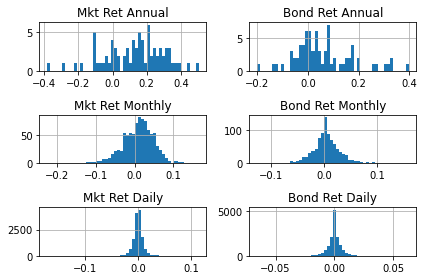

In [3]:
#### Q3C ####

def histogram(df_annual, df_monthly, df_daily):
    fig, axes = plt.subplots(3,2)

    df_annual["mktret"].hist(bins=50, ax=axes[0,0])
    df_annual["bondret"].hist(bins=50, ax=axes[0, 1])
    df_monthly["mktret"].hist(bins=50, ax=axes[1, 0])
    df_monthly["bondret"].hist(bins=50, ax=axes[1, 1])
    df_daily["mktret"].hist(bins=50, ax=axes[2, 0])
    df_daily["bondret"].hist(bins=50, ax=axes[2, 1])

    axes[0,0].set_title("Mkt Ret Annual")
    axes[0, 1].set_title("Bond Ret Annual")
    axes[1, 0].set_title("Mkt Ret Monthly")
    axes[1, 1].set_title("Bond Ret Monthly")
    axes[2, 0].set_title("Mkt Ret Daily")
    axes[2, 1].set_title("Bond Ret Daily")

    fig.tight_layout()

    plt.show()

histogram(data_annual, data_monthly, data_daily)

In [4]:
#### Q3D ####

def confidence_interval(mean, std, n):
    v = 1.960 * (std / np.sqrt(n))
    return (mean - v, mean + v)

def confidence_interval_30(mean, std, n):
    scaled_mean = 30 * mean
    scaled_std = sqrt(30) * std
    return confidence_interval(scaled_mean, scaled_std, n)

def confidence_intervals(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    mkt_len = len(df["mktret"])
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()
    bond_len = len(df["bondret"])
    
    print("Mkt Ret Conf Interval 1 period " + frequency, confidence_interval(mkt_mean, mkt_std, mkt_len))
    print("Bond Ret Conf Interval 1 period " + frequency, confidence_interval(bond_mean, bond_std, bond_len))
    print("Mkt Ret Conf Interval 30 period " + frequency, confidence_interval(mkt_mean, mkt_std, mkt_len))
    print("Bond Ret Conf Interval 30 period " + frequency, confidence_interval(bond_mean, bond_std, bond_len))
    print("==================")
    
confidence_intervals(data_annual, "Annual")
confidence_intervals(data_monthly, "Monthly")
confidence_intervals(data_daily, "Daily")

Mkt Ret Conf Interval 1 period Annual (0.09065897043481361, 0.1676812664072916)
Bond Ret Conf Interval 1 period Annual (0.03605771303990829, 0.0876534492232496)
Mkt Ret Conf Interval 30 period Annual (0.09065897043481361, 0.1676812664072916)
Bond Ret Conf Interval 30 period Annual (0.03605771303990829, 0.0876534492232496)
Mkt Ret Conf Interval 1 period Monthly (0.007226725174642453, 0.012707507383497085)
Bond Ret Conf Interval 1 period Monthly (0.003164472284265153, 0.0067715974831767094)
Mkt Ret Conf Interval 30 period Monthly (0.007226725174642453, 0.012707507383497085)
Bond Ret Conf Interval 30 period Monthly (0.003164472284265153, 0.0067715974831767094)
Mkt Ret Conf Interval 1 period Daily (0.0002589761826545843, 0.0005792984857145723)
Bond Ret Conf Interval 1 period Daily (-5.2367406629487645e-05, 0.00012662966100985225)
Mkt Ret Conf Interval 30 period Daily (0.0002589761826545843, 0.0005792984857145723)
Bond Ret Conf Interval 30 period Daily (-5.2367406629487645e-05, 0.0001266296

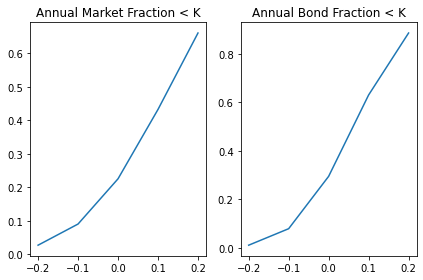

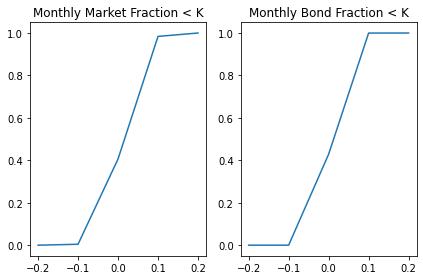

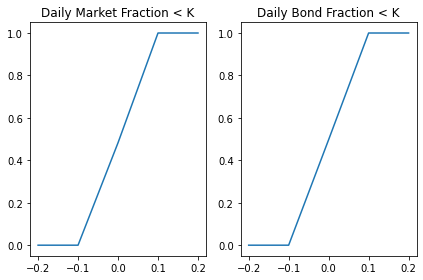

In [5]:
#### Q3E ####

## Helper function for plotting
def plot(frequency, mkt_probs, bond_probs, k):
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(k, mkt_probs)
    ax[1].plot(k, bond_probs)
    ax[0].set_title(frequency + " Market Fraction < K")
    ax[1].set_title(frequency + " Bond Fraction < K")

    fig.tight_layout()
    
    plt.show()

def shortfall_plot(df, frequency):
    k = [-.2, -.1, 0, .1, .2]
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()

    mkt_probs = []
    bond_probs = []

    for i in k:
        mkt_probs.append(stats.norm(mkt_mean, mkt_std).cdf(i))
        bond_probs.append(stats.norm(bond_mean, bond_std).cdf(i))

    plot(frequency, mkt_probs, bond_probs, k)
    
shortfall_plot(data_annual, "Annual")
shortfall_plot(data_monthly, "Monthly")
shortfall_plot(data_daily, "Daily")

In [6]:
#### Q3F ####

def prob_stock_lower_than_bond(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    diff_mean = bond_mean - mkt_mean
    cov = df["mktret"].cov(df["bondret"])
    diff_var = bond_var + mkt_var - 2*cov


    prob = 1 - stats.norm.cdf((0 - diff_mean) / np.sqrt(diff_var))
    print("Probability Bond Ret > Stock Ret " + frequency + ": ", prob)
    
prob_stock_lower_than_bond(data_annual, "Annual")
prob_stock_lower_than_bond(data_monthly, "Monthly")
prob_stock_lower_than_bond(data_daily, "Daily")

Probability Bond Ret > Stock Ret Annual:  0.37663647702579894
Probability Bond Ret > Stock Ret Monthly:  0.459317144494223
Probability Bond Ret > Stock Ret Daily:  0.4861664155508274


In [9]:
## Helper function for running simulations
def simulation(mkt_samples, bond_samples, k):
    mkt_probs = []
    bond_probs = []
    n = len(mkt_samples)
    for i in k:
        num_mkt_less = 0.0
        num_bond_less = 0.0
        for j in range(0,n):

            if mkt_samples[j] < i:
                num_mkt_less += 1.0

            if bond_samples[j] < i:
                num_bond_less += 1.0

        mkt_probs.append(num_mkt_less / n)
        bond_probs.append(num_bond_less / n)
    
    return (mkt_probs, bond_probs)

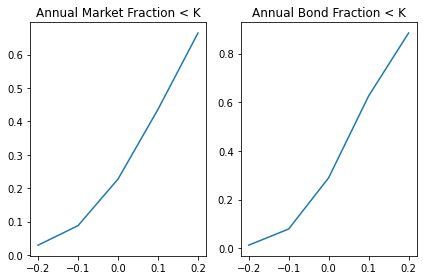

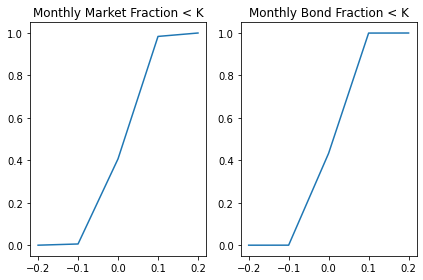

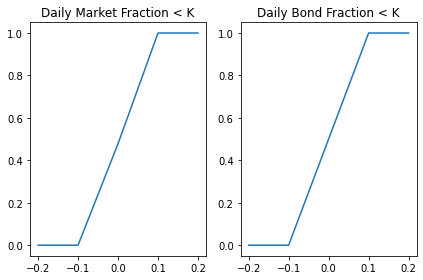

In [10]:
#### Q4A ####

def simulation_normal(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_std = df["mktret"].std()
    bond_mean = df["bondret"].mean()
    bond_std = df["bondret"].std()

    mkt_norm = stats.norm(mkt_mean, mkt_std)
    bond_norm = stats.norm(bond_mean, bond_std)

    mkt_samples = mkt_norm.rvs(size=10000)
    bond_samples = bond_norm.rvs(size=10000)

    k = [-.2, -.1, 0, .1, .2]

    mkt_probs, bond_probs = simulation(mkt_samples, bond_samples, k)
    plot(frequency, mkt_probs, bond_probs, k)
    
simulation_normal(data_annual, "Annual")
simulation_normal(data_monthly, "Monthly")
simulation_normal(data_daily, "Daily")

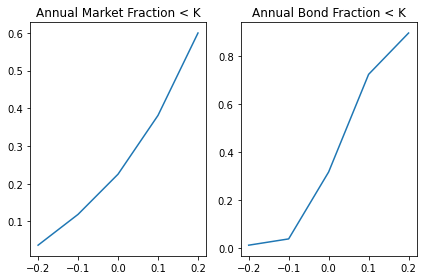

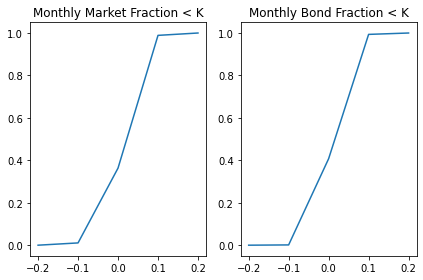

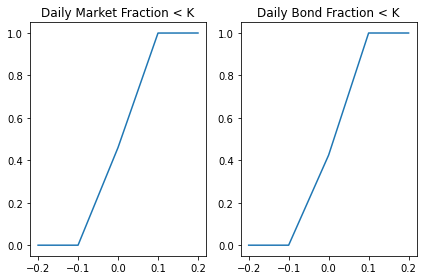

In [11]:
#### Q4B ####

def simulation_empirical(df, frequency):
    mkt_samples = df["mktret"].sample(10000, replace=True).values
    bond_samples = df["bondret"].sample(10000, replace=True).values

    k = [-.2, -.1, 0, .1, .2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)
    
    plot(frequency, mkt_probs, bond_probs, k)
    
simulation_empirical(data_annual, "Annual")
simulation_empirical(data_monthly, "Monthly")
simulation_empirical(data_daily, "Daily")

In [12]:
#### Q4C ####

def prob_greater_than_twenty(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    print("==============")
    mkt_prob = 1 - stats.norm(5*mkt_mean, np.sqrt(5*mkt_var)).cdf(.2)
    print("Probability Market Ret > 20% " + frequency + ": ", mkt_prob)

    bond_prob = 1 - stats.norm(5 * bond_mean, np.sqrt(5 * bond_var)).cdf(.2)
    print("Probability Bond Ret > 20% " + frequency + ": ", bond_prob)
    
prob_greater_than_twenty(data_annual, "Annual")
prob_greater_than_twenty(data_monthly, "Monthly")
prob_greater_than_twenty(data_daily, "Daily")  

Probability Market Ret > 20% Annual:  0.8777956926546506
Probability Bond Ret > 20% Annual:  0.6649114927690836
Probability Market Ret > 20% Monthly:  0.054978542279975895
Probability Bond Ret > 20% Monthly:  0.0023064267928946114
Probability Market Ret > 20% Daily:  0.0
Probability Bond Ret > 20% Daily:  0.0


In [15]:
#### Q4D ####

def five_consecutive_known(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    mkt_norm = stats.norm(5*mkt_mean, np.sqrt(5*mkt_var))
    bond_norm = stats.norm(5*bond_mean, np.sqrt(5*bond_var))

    mkt_samples = mkt_norm.rvs(size=10000)
    bond_samples = bond_norm.rvs(size=10000)
    
    k = [0.2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)

    print("============")
    print(frequency + " 5 Consecutive Periods Known Market Prob: ", 1 - mkt_probs[0])
    print(frequency + " 5 Consecutive Periods Known Bond Prob: ", 1 - bond_probs[0])
    
five_consecutive_known(data_annual, "Annual")
five_consecutive_known(data_monthly, "Monthly")
five_consecutive_known(data_daily, "Daily")

Annual 5 Consecutive Periods Known Market Prob:  0.8799
Annual 5 Consecutive Periods Known Bond Prob:  0.6649
Monthly 5 Consecutive Periods Known Market Prob:  0.05569999999999997
Monthly 5 Consecutive Periods Known Bond Prob:  0.0021999999999999797
Daily 5 Consecutive Periods Known Market Prob:  0.0
Daily 5 Consecutive Periods Known Bond Prob:  0.0


In [17]:
#### Q4E ####

def five_consecutive_empirical(df, frequency):
    mkt_mean = df["mktret"].mean()
    mkt_var = df["mktret"].var()
    bond_mean = df["bondret"].mean()
    bond_var = df["bondret"].var()

    df["mktret_5_sum"] = df["mktret"].rolling(window=5).sum()
    df["bondret_5_sum"] = df["bondret"].rolling(window=5).sum()

    mkt_samples = df["mktret_5_sum"].sample(10000, replace=True).values
    bond_samples = df["bondret_5_sum"].sample(10000, replace=True).values
    
    k = [0.2]

    (mkt_probs, bond_probs) = simulation(mkt_samples, bond_samples, k)

    print("============")
    print(frequency + " 5 Consecutive Periods Empirical Market Prob: ", 1 - mkt_probs[0])
    print(frequency + " 5 Consecutive Periods Empirical Bond Prob: ", 1 - bond_probs[0])
    
five_consecutive_empirical(data_annual, "Annual")
five_consecutive_empirical(data_monthly, "Monthly")
five_consecutive_empirical(data_daily, "Daily")

Annual 5 Consecutive Periods Empirical Market Prob:  0.8905
Annual 5 Consecutive Periods Empirical Bond Prob:  0.6109
Monthly 5 Consecutive Periods Empirical Market Prob:  0.046499999999999986
Monthly 5 Consecutive Periods Empirical Bond Prob:  0.018000000000000016
Daily 5 Consecutive Periods Empirical Market Prob:  0.00019999999999997797
Daily 5 Consecutive Periods Empirical Bond Prob:  0.00029999999999996696


In [18]:
#### Q4F ####

def prob_stock_lower_than_bond_30(df, frequency):
    mkt_mean = 30*df["mktret"].mean()
    mkt_var = np.sqrt(30*df["mktret"].var())
    bond_mean = 30*df["bondret"].mean()
    bond_var = np.sqrt(30*df["bondret"].var())

    df["mktret_30_sum"] = df["mktret"].rolling(window=30).sum()
    df["bondret_30_sum"] = df["bondret"].rolling(window=30).sum()

    diff_mean = bond_mean - mkt_mean
    cov = df["mktret_30_sum"].cov(df["bondret_30_sum"])
    diff_var = bond_var + mkt_var - 2*cov

    prob = 1 - stats.norm.cdf((0 - diff_mean) / np.sqrt(diff_var))
    print("========")
    print("Probability Bond Ret > Stock Ret over 30 periods " + frequency + ": ", prob)
    
prob_stock_lower_than_bond_30(data_annual, "Annual")
prob_stock_lower_than_bond_30(data_monthly, "Monthly")
prob_stock_lower_than_bond_30(data_daily, "Daily")

Probability Bond Ret > Stock Ret over 30 periods Annual:  0.044668880514807
Probability Bond Ret > Stock Ret over 30 periods Monthly:  0.40350873912290786
Probability Bond Ret > Stock Ret over 30 periods Daily:  0.48410317542165227
